In [1]:

import os
from google.colab import drive
drive.mount('/content/drive')

# Import: imports
directory_path = "/content/drive/My\ Drive/Embodied_counting/src/"

file_name = "imports.py"
PATH = directory_path + file_name
%run -i $PATH

# Import: environment
directory_path = "/content/drive/My\ Drive/Embodied_counting/src/environment/"

file_name = "count_environment.py"
PATH = directory_path + file_name
%run -i $PATH
!python $PATH

file_name = "solving_algorithms.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: models
directory_path = "/content/drive/My\ Drive/Embodied_counting/src/models/"

file_name = "LangConvLSTM.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: train_and_test
directory_path = "/content/drive/My\ Drive/Embodied_counting/src/train_and_test/"

file_name = "train_model_original.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "test_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "demonstrate_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "env_to_pytorch_interface.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: manage_results
directory_path = "/content/drive/My\ Drive/Embodied_counting/src/manage_results/"

file_name = "run_schedules.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "save_and_plot.py"
PATH = directory_path + file_name
%run -i $PATH

CUDA_bool = False

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Import ...
Libraries/Packages successfully imported...
Load Count-Environment..!
Load Count-Environment..!
Loading Automatic Solving Algorithms..
Loading model....
Load training process..
Load test process .... 
Import demonstrate-model ..
Load env-to-pytorch interface .... 
Load run, schedules ..! 
Load result managing..!


In [0]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [10]:
print(env.display)

game


In [11]:
################################
## Demonstrate Counting Environment: Solving algorithm
###############################

env = CountEnv(mode="pick_square", max_dist = 10, n_squares = 2, display = "game", save_epoch = False )
env.task = "count_on"
env.print_sub_tasks_after_steps = True
env.print_action_onehot_aftersteps = True
env.rand_n_squares = False
env.add_n = 3
print(env.task)
env.reset()

env.display = "None"
#env.solve_task()
#demonstrate_model(env, model)
#do_nothing(env)
env.solve_task()

count_on
One-to-one correspondence:  False
Right number sequence:  False
--------------------------------
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1']
['D', 'U', 'R', 'L', 'P', 'Dr', 'T', 'A', 'E', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'S']
--------------------------------
One-to-one correspondence:  False
Right number sequence:  False
--------------------------------
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1']
['D', 'U', 'R', 'L', 'P', 'Dr', 'T', 'A', 'E', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'S']
--------------------------------
One-to-one correspondence:  False
Right number sequence:  False
--------------------------------
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1']
['D', 'U', 'R', 'L', 'P', 'Dr', 'T', 'A', 'E', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'S']
--------------------------------
----------------------

In [0]:

print("Load Count-Environment....")

class Square():
  def __init__(self, pos, id_, n_neighbours):
    self.pos = pos
    self.id = id_
    self.n_neighbours = n_neighbours
    self.update_obs()
    
    self.picked_already = False 
    self.touched_already = False 
    self.touched_count = 0
    
    
  def update_obs(self):
    self.data = np.ones((1, 1), dtype=np.uint8)*255
    self.obj_belong_fct = np.zeros((2*self.n_neighbours, 2*self.n_neighbours), dtype=np.uint8)
    

    
  def move(self, direction):
    move_dist=1
    
    if(direction=="right"):
      self.pos.x += move_dist
    elif(direction=="left"):
      self.pos.x -= move_dist
    elif(direction=="up"):
      self.pos.y += move_dist
    elif(direction=="down"):
      self.pos.y -= move_dist
      
    self.update_obs()

class Hand():
    def __init__(self, data,data_mask, pos):
      self.data = data
      self.pos = pos
      self.data_mask = data_mask
      

class Pos():
  def __init__(self, x_, y_):
    self.x = x_
    self.y = y_
  
  
class CountEnv():
    def __init__(self,task_ = "touch_all_objects", mode="pick_square", max_dist = 20, n_squares = 1, display = "None", save_epoch = False, img_size = 4, obj_source="squares"):
        
        self.img_size = img_size
        self.view_size = img_size
        self.mode = mode
        self.n_squares_max = n_squares
        self.max_dist = max_dist
        self.task = task_   # move_all_squares_from_source_to_target / touch_all_objects
        
        self.count_action = False
        self.motor_action = False
        self.since_count_action = 0
        self.show_number_length = 1
        self.show_number = False
        self.last_count_number = 0
        self.rand_n_squares=True
        
        self.IsTripleAction = False
        self.action_motor = ""
        self.action_IsSayWord = True
        self.action_word = ""
        
        self.counted_word_list = [] 
        self.aimed_count_list = []
        self.counted_square_list = []
        self.aimed_given_square_id_list = []
        self.given_square_id_list = []
        
        self.sample_task = False
        self.task_list = None
        self.observation_hand = []
        self.observation_square = []
        
        self.n_squares_max_list = [self.n_squares_max]*10
        self.n_squares_wished = -1
        self.active_context = 1
        self.active_object = 2
        
        
        
        
        self.reset()
        
        self.n_motor_actions = 7
        self.n_words = 10
        
        self.n_actions = self.n_motor_actions + self.n_words + 2
        self.action = 1
        self.action_onehot = np.array([int(i == 0) for i in range(self.n_actions)])
        self.total_reward = 0
        self.display = display
        self.save_epoch = save_epoch
        self.relations = []
        
        self.move_dist = 1

        
        self.task_vector_length = 20
        self.obj_source = obj_source
        
        self.pick_from_00 = False
        self.pick_from_00_then_move = False
        self.give_n_current_squares = 1
        self.readable_action_onehot = []
        
        self.print_action_onehot_aftersteps = False
        self.print_sub_tasks_after_steps = False
        
        

            
        
        

        
        
    def reset(self):
      
        self.time = 0
        self.ended = False
        self.total_reward = 0
        self.picked = False
        self.time_penalty = 0.02
        self.epoch = []
        self.IsTripleAction = False
        self.hand_is_visible = True
        self.square_is_visible = True
        self.second_action = True
        self.since_last_event_count = 1
        self.event_had_occured_already = False
        self.last_action_is_count = True
        self.steps_after_given_square = 2
        
        self.n_wait_steps = random.randint(1,5)
        self.last_event_count = 0
        self.stopped_early = False
        self.one_step_after_event = False
        
        self.one_to_one_correspondence = False
        self.right_number_order = False
        self.variability = 0.0
        
        self.missed_count = False
        self.counted_none_object = False
         
        
        if(self.sample_task==True):
            self.task = random.sample(self.task_list,1)[0]  
        
        if(self.task_list is None):
          self.task_n = 0
        else:
          self.task_n = self.task_list.index(self.task)
            
            
        if(self.rand_n_squares==True):
            self.n_squares = random.randint(1,self.n_squares_max)
            self.n_squares = random.randint(1,self.n_squares_max_list[self.task_n])
        else:
            self.n_squares = self.n_squares_max
        
        if(self.rand_n_squares==True and self.sample_task==True):
            self.n_squares = random.randint(1,self.n_squares_max_list[self.task_n])

        if(self.n_squares_wished >= 0):
            self.n_squares = self.n_squares_wished
        
        self.task_n = 0
        
        self.counted_word_list = [] 
        self.aimed_count_list = []
        self.counted_square_list = []
        self.given_square_id_list = []
        self.aimed_given_square_id_list = []
        
        for i in range(self.n_squares):
            self.aimed_count_list.append(str(i+1) )
            #self.aimed_count_list.append(str(self.n_squares - i) )
            self.aimed_given_square_id_list.append(str(i+1) )
            


        self.max_time = 100
        ## Task encoding: task, object and quantifier to integer
        if(self.task == 'touch_all_objects'):
            self.task_n = 0
            self.object_n = 0
            self.quant_n = 0
            self.max_time = self.n_squares*10
        #elif(self.task == 'move_all_squares_from_source_to_target'):
        #    self.task_n = 1
        #    self.object_n = 0
        #    self.quant_n = 0
        elif(self.task == 'count_all_objects'):
            self.task_n = 1
            self.object_n = 0
            self.quant_n = 0
            self.max_time = self.n_squares*10
        elif(self.task == 'count_all_events'):
            self.task_n = 1
            self.object_n = 1
            self.quant_n = 0
            self.hand_is_visible = False
            self.max_time = self.n_squares*8
            
        elif(self.task == 'count_all_events_1'):
            self.task_n = 0
            self.object_n = 1
            self.quant_n = 0
            self.hand_is_visible = False
            self.max_time = self.n_squares*8

        elif(self.task == 'count_all_events_2'):
            self.task_n = 1
            self.object_n = 1
            self.quant_n = 0
            self.hand_is_visible = False
            self.max_time = self.n_squares*8            
            
        elif(self.task == 'give_n'):
            self.task_n = 2
            self.object_n = 0
            self.quant_n = self.n_squares  
            self.max_time = self.n_squares*9 + 6  
                        
        elif(self.task == 'recite_n'):
            self.task_n = 3
            self.object_n = 0
            self.quant_n = self.n_squares
            self.hand_is_visible = False
            self.square_is_visible = False
            self.max_time = self.n_squares*2
            
        elif(self.task == 'do_nothing'):
            self.task_n = 4
            self.object_n = 1
            self.quant_n = 0
            self.hand_is_visible = False
            self.square_is_visible = False
            self.max_time = self.n_squares*2
            self.did_nothing = True

        elif(self.task == 'recite_n_inverse'):
            self.task_n = 5
            self.object_n = 0
            self.quant_n = self.n_squares
            self.hand_is_visible = False
            self.square_is_visible = False
            self.max_time = self.n_squares*2
            for i in range(self.n_squares):
               self.aimed_count_list.append(str(self.n_squares-i) )
           
        
            

            
        background = np.zeros([self.img_size,1])
        
                
        self.background = background
        
        
        pnt_size = 1
        
        pointer, pointer_mask = np.array([[255]]), np.array([[255]])
        pointer_grab, _ = np.array([[255]]), np.array([[255]])

        hand_pos_x = random.randint(0,self.img_size-1) 
        hand_pos_y = random.randint(0,self.img_size-1) 
        pos = Pos(hand_pos_x, hand_pos_y)
        hand = Hand(pointer,pointer_mask, pos)
        hand_grab = Hand(pointer_grab,pointer_mask, pos)
        
        squares = [] #Create_N_Sqaures(self.n_squares, mode = self.mode, max_dist = self.max_dist, img_size = self.img_size)
        pos_list = []
        for n in range(self.n_squares):
            
            pos_not_ok = True
            rand_pixel_1 = random.randint(0,self.img_size-1) 
            rand_pixel_2 = random.randint(0,self.img_size-1) 
            
            while(pos_not_ok):
                rand_pixel_1 = random.randint(0,self.img_size-1) 
                rand_pixel_2 = random.randint(0,self.img_size-1) 
                pos_array = np.array([rand_pixel_1, rand_pixel_2])
                
                if(any((pos_array == x).all() for x in pos_list)):
                    pos_not_ok = True
                else:
                    pos_not_ok = False
                    pos_list.append(pos_array)
                                      
            pos = Pos(rand_pixel_1, rand_pixel_2)
            square_now = Square(pos, n+1, 0 )  #data, pos, id_, n_neighbours
            squares.append(square_now)
        
        if(self.task == "give_n"):
            self.squares = []
            pos = Pos(0, 0)
            square_now = Square(pos, 1, 0 )  #data, pos, id_, n_neighbours
            self.squares.append(square_now)
            self.obj_source = "infinite_squares"
            #self.squares = squares
        else:
            self.squares = squares
        
        if(self.task=="count_all_events"):
            self.squares = []
            pos = Pos(3, 3)
            new_square = Square(pos, 0, 0 )  #(data,) pos, id_, n_neighbours
            self.squares.append(new_square)
            self.event_there = False
            self.square_is_visible = False
        
        if(self.task=="count_all_events_1"):
            self.squares = []
            pos = Pos(3, 3)
            new_square = Square(pos, 0, 0 )  #(data,) pos, id_, n_neighbours
            self.squares.append(new_square)
            self.event_there = False
            
            self.active_context = 0
            print("self.active_object = 2")
            self.active_object = 2
            self.square_is_visible = False
        if(self.task=="count_all_events_2"):
            self.squares = []
            pos = Pos(3, 3)
            new_square = Square(pos, 0, 0 )  #(data,) pos, id_, n_neighbours
            self.squares.append(new_square)
            self.event_there = False
            
            self.active_context = 1
            self.active_object = 3
            self.square_is_visible = False
        
        
        
        self.hand = hand        
        self.hand_nongrab = copy(hand)
        self.hand_grab = copy(hand_grab)
        
        self.visObs, self.observation, self.obj_belong_fct = self.constructObs()
        #print("self.obj_belong_fct: ", self.obj_belong_fct)
        self.IsGrab = False
        self.IsTouch = False
        
        self.grabed_square = 0
        
        self.reward = 0
        self.picked_once_already = False
        self.been_right_already = False
        self.is_done = False
        #display(Image.fromarray(hand.data) )
        #display(Image.fromarray(hand_grab.data) )
        self.pick_from_00 = False
        self.pick_from_00_then_move = False
        self.give_n_current_squares = 1
        
        
    def constructObs(self):
            
        # Array
        self.observation = copy(self.background)
        self.observation_hand = copy(self.background)
        self.observation_square = copy(self.background)
        self.obj_belong_fct = np.zeros([self.img_size,self.img_size]).astype(int) #copy(self.background).astype(int)

        self.observation[self.active_context, 0] = 255
        if(self.square_is_visible == True):
            self.observation[self.active_object, 0] = 255
        
        
        #print("self.obj_belong_fct: ", self.obj_belong_fct )

        observation_copy = copy(self.observation)        
        #self.observationImg.paste(hand_img, (self.hand.pos.x, self.hand.pos.y), hand_mask)
        self.observationImg = Image.fromarray(observation_copy)
        self.observationImg = self.observationImg.resize( (100,400))
        
                #### Count window
        if(self.show_number == True):
            count_window_size = 8
            intensity_factor = 1 # np.sin(self.since_count_action/self.show_number_length*np.pi)
            count_window = create_count_window(count_window_size, n=self.last_count_number )*intensity_factor
            count_window = Image.fromarray(count_window).resize((50,50)).convert('RGB')
            bord_dist = int(self.img_size/20)       
            #observation_copy[bord_dist:count_window_size+bord_dist, self.img_size - count_window_size - bord_dist:self.img_size-bord_dist] = count_window
            #self.observation[bord_dist:count_window_size+bord_dist, self.img_size - count_window_size - bord_dist:self.img_size-bord_dist] = count_window 
            bg_w, bg_h = self.observationImg.size
            img_w, img_h = count_window.size
            offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
            if(self.task == "count_all_events"):
              offset = ((bg_w - img_w) // 12, (bg_h - img_h) // 12)
            self.observationImg.paste(count_window, offset)
        
        return self.observationImg, self.observation, self.obj_belong_fct
      
    def solve_task(self):
                 
          if(self.task == "touch_all_objects"):
              touch_all_objects(self)
              
          if(self.task == "count_all_objects"):
              count_all_objects(self)              
          if(self.task == "move_all_squares_from_source_to_target"):
              move_all_squares_from_source_to_target(self)
          if(self.task == "give_n"):
              give_n(self) 
          if(self.task == "count_all_events"):
              count_all_events(self) 
          if(self.task == "count_all_events_1"):
              count_all_events(self) 
          if(self.task == "count_all_events_2"):
              count_all_events(self) 
          if(self.task == "recite_n"):
              recite_n(self)  
          if(self.task == "do_nothing"):
              do_nothing(self)    
          if(self.task == "recite_n_inverse"):
              recite_n_inverse(self)    
              
    def print_actions(self):
        a = self.action_onehot.astype(int).astype(str).tolist()
        b = self.a_strings[0]
        
        print("--------------------------------")
        print(a)
        print(b)
        print("--------------------------------")
        
    def readable_actionstring(self):
        a = self.action_onehot.astype(int).astype(str).tolist()
        b = self.a_strings[0]
        
        readable_actionstring = str(a) + "\n" + str(b)

        return readable_actionstring
    
    def triple_action_one_hot(self, action_motor,IsDoMotorAction,action_word, action_IsSayWord):
        action_onehot = np.zeros(self.n_actions)
        
        
        if(IsDoMotorAction==True):  
            action_onehot[Action_inv[action_motor]] = 1
            #print("Action_inv[action_motor]: ", Action_inv[action_motor])
            #action_onehot[-2] = 1
            action_onehot[self.n_motor_actions] = 1
        
        
        if(action_IsSayWord):
            action_onehot[Action_inv[action_word]+1] = 1
            #action_onehot[0] = 1  #"+1" because Is_Action sneaks in into onehot
            action_onehot[-1] = 1

            
        self.a_strings = [["D", "U", "R", "L", "P", "Dr", "T","A", "E", "1", "2", "3","4","5","6","7","8","9","S"]]
        self.readable_action_onehot = np.vstack((action_onehot.astype(str),np.asarray(self.a_strings,str)))
        

            
        return action_onehot
              
    def triple_update(self, action_motor, IsDoMotorAction, word, IsSayWord):


              
        # If input was string convert to int
        if(type(action_motor)==int):
            action_motor = Action[action_motor]
        else:
            action_motor = action_motor
            
        if(type(word)==int):
            word = Action[word]
        else:
            word = word
      
        # Globalize to instance variables
        self.action_motor = action_motor
        self.action_IsSayWord = IsSayWord
        self.IsSayWord = IsSayWord
        self.IsDoMotorAction = IsDoMotorAction
        self.action_word = word
        
        self.IsTripleAction = True
        
        self.second_action = False
        
        if(IsDoMotorAction):
          if(IsSayWord == False):
              self.second_action = True
          self.update(action_motor)
        
        self.observationImg_between = self.observationImg
        
        self.second_action = True
        if(IsSayWord):
            self.update(word)
        '''    
        # COUNT ALL EVENTS      
        if(self.task=="count_all_events" and self.second_action == True):        
          self.last_event_count+=1
        
          if(self.last_event_count>self.n_wait_steps):
            self.event_there = True  
            self.event_had_occured_already = True
            self.n_wait_steps = random.randint(1,5)
            self.last_event_count = 0
            self.square_is_visible = True

            self.squares = []
            pos = Pos(1, 1)
            new_square = Square(pos, 0, 0 )  #(data,) pos, id_, n_neighbours
            self.squares.append(new_square)

            pos = Pos(2, 1)
            new_square = Square(pos, 0, 0 )  #(data,) pos, id_, n_neighbours
            self.squares.append(new_square)

            pos = Pos(1, 2)
            new_square = Square(pos, 0, 0 )  #(data,) pos, id_, n_neighbours
            self.squares.append(new_square)

            pos = Pos(2, 2)
            new_square = Square(pos, 0, 0 )  #(data,) pos, id_, n_neighbours
            self.squares.append(new_square)
 
          else:
            self.square_is_visible = False
            self.squares = []
            pos = Pos(3, 3)
            new_square = Square(pos, 0, 0 )  #(data,) pos, id_, n_neighbours
            self.squares.append(new_square) 
            self.event_there = False
            
          self.since_last_event_count = self.last_event_count
          self.one_step_after_event = False
          if(self.last_event_count == 1 and self.event_had_occured_already == True):
            self.one_step_after_event = True          
        '''
        
        self.action_onehot = self.triple_action_one_hot(self.action_motor, self.IsDoMotorAction, self.action_word, self.IsSayWord)
        #action_motor,IsDoMotorAction,action_word, action_IsSayWord)
          
        
        
        

              
        self.IsTripleAction = False
        self.IsTouch = False
        
        if(self.print_action_onehot_aftersteps):
          self.print_actions()

        if(self.save_epoch):
            img, action = envImageAndActionToPytorchFormat(self)
            object_features = get_object_features(self)
            dual_relations = get_dual_relations_from_features(object_features).float()
            self.relations = dual_relations
            action_string = self.readable_actionstring()
            curr_exp = {'img': img, 'action': action, 'rel': dual_relations, 'dem_img': self.observationImg, 'action_string': action_string}
            self.epoch.append(curr_exp)
            
        self.visObs = self.constructObs()
        
        
        #Turn this on if you want to save the last frame in save_epoch as well for demonstration or anything

        if(self.save_epoch and self.ended):
            img, action = envImageAndActionToPytorchFormat(self)
            object_features = get_object_features(self)
            dual_relations = get_dual_relations_from_features(object_features).float()
            self.relations = dual_relations
            action_string = self.readable_actionstring()
            curr_exp = {'img': img, 'action': action, 'rel': dual_relations, 'dem_img': self.observationImg, 'action_string': action_string}
            self.epoch.append(curr_exp)
        
        
        
        
    def update(self, action):
      
      
      
      #if(self.time > 20):
        #self.ended = True
        
      
      
      self.reward = 0
      
      move_dist=self.move_dist
      
      if(type(action)==int):
        self.action = Action[action]
      else:
        self.action = action
      
      
      
      if(Action_inv[self.action]>7 and Action_inv[self.action]<19):
          self.action_onehot = np.array([int(i == Action_inv[self.action]) for i in range(self.n_actions)])
          self.count_action = True
          self.since_count_action = 0
          self.show_number = True
          self.last_count_number = int(self.action)
          self.motor_action = False

      else:
          self.count_action = False
          self.motor_action = True
      
      if(Action_inv[self.action]==4):
          #self.count_action = True
          self.since_count_action = 0
          self.show_number = True
          self.last_count_number = 10     
      if(Action_inv[self.action]==5):
          #self.count_action = True
          self.since_count_action = 0
          self.show_number = True
          self.last_count_number = 11  
          
      if(Action_inv[self.action]==6):
          #self.count_action = True
          self.since_count_action = 0
          self.show_number = True
          self.last_count_number = 12 
          
      if(Action_inv[self.action]==7):
          #self.count_action = True
          self.since_count_action = 0
          self.show_number = True
          self.last_count_number = 13 
          
      if(self.since_count_action < self.show_number_length):
          self.since_count_action += 1
      else: 
          self.show_number = False
      #print("incoming action int: ", action)
      #print("working internally with action: ", self.action)
      

      
      
      #################
      ## ACTIONS
      #################
      
      if(self.action=="down"):
        self.action_onehot = np.array([int(i == 0) for i in range(self.n_actions)])
        
        actual_move_distance = 0
        if(self.hand.pos.x<self.img_size-1):
          actual_move_distance = move_dist
          
        # Move hand and object (if grabbed) by actual_move_distance
        self.hand.pos.x += actual_move_distance                
        if(self.IsGrab == True):
          self.squares[self.grabed_square-1].pos.x += actual_move_distance
        
        
      elif(self.action=="up"):
        self.action_onehot = np.array([int(i == 1) for i in range(self.n_actions)])
        
        actual_move_distance = 0
        if(self.hand.pos.x>0):
          actual_move_distance = move_dist
          
        self.hand.pos.x -= actual_move_distance
        if(self.IsGrab == True):
          self.squares[self.grabed_square-1].pos.x -= actual_move_distance
          
      elif(self.action=="right"):
        self.action_onehot = np.array([int(i == 2) for i in range(self.n_actions)])
              
        actual_move_distance = 0
        if(self.hand.pos.y<self.img_size-1):
          actual_move_distance = move_dist
          
        self.hand.pos.y += actual_move_distance
        if(self.IsGrab == True):
          self.squares[self.grabed_square-1].pos.y += actual_move_distance
          
          
      elif(self.action=="left"):
        self.action_onehot = np.array([int(i == 3) for i in range(self.n_actions)])
                
        actual_move_distance = 0
        if(self.hand.pos.y>0):
          actual_move_distance = move_dist
          
        self.hand.pos.y -= actual_move_distance
        if(self.IsGrab == True):
          self.squares[self.grabed_square-1].pos.y -= actual_move_distance
          
          
      elif(self.action=="pick"):
        self.action_onehot = np.array([int(i == 4) for i in range(self.n_actions)])
        #print("self.obj_belong_fct[self.hand.pos.x, self.hand.pos.y] ", self.obj_belong_fct[self.squares[0].pos.x+1, self.squares[0].pos.y+1])
        if(self.obj_belong_fct[self.hand.pos.x, self.hand.pos.y] != 0):
          self.grabed_square = self.obj_belong_fct[self.hand.pos.x, self.hand.pos.y]
          #print("grabed square ", self.grabed_square)
          self.IsGrab = True
          self.hand.data = copy(self.hand_grab.data)
          self.squares[self.grabed_square-1].picked_already = True
          if(self.hand.pos.x == 0 and self.hand.pos.y==0):
            self.pick_from_00 = True
          

          if(self.picked_once_already == False):
            
            self.picked = True
            self.time_penalty = 0.0
          self.picked_once_already = True
        
      elif(self.action=="release"):
        self.action_onehot = np.array([int(i == 5) for i in range(self.n_actions)])
        if(self.IsGrab):
          if(self.hand.pos.y > int(self.img_size/2) ):
            #self.reward += 1.0
            self.is_done = True
        if(self.IsGrab==True and self.hand.pos.y == self.img_size-1):
            self.given_square_id_list.append(str(self.grabed_square) )
            self.steps_after_given_square = 0
            
        self.IsGrab = False  
        self.hand.data = copy(self.hand_nongrab.data)
       
      elif(self.action=="touch"):     
          self.action_onehot = np.array([int(i == 6) for i in range(self.n_actions)])
        
          if(self.obj_belong_fct[self.hand.pos.x + int(self.hand.data.shape[0]/2), self.hand.pos.y + int(self.hand.data.shape[1]/2)] != 0):
              self.touched_square = self.obj_belong_fct[self.hand.pos.x + int(self.hand.data.shape[0]/2), self.hand.pos.y + int(self.hand.data.shape[1]/2)]
              self.IsTouch = True
              self.hand.data = copy(self.hand_grab.data)
              self.squares[self.touched_square-1].touched_already = True
              self.squares[self.touched_square-1].touched_count += 1
          if(self.obj_belong_fct[self.hand.pos.x + int(self.hand.data.shape[0]/2), self.hand.pos.y + int(self.hand.data.shape[1]/2)] == 0):   
              self.counted_none_object = True
              
      elif(self.action=="stop"):     
        self.action_onehot = np.array([int(i == 7) for i in range(self.n_actions)])
        
      if(self.task == "give_n"):   
          if(Action_inv[self.action]>self.n_motor_actions and Action_inv[self.action]<17):
            self.counted_word_list.append(self.action)
          if(self.action == "stop"):
              if(self.given_square_id_list != self.aimed_given_square_id_list or self.counted_word_list!=self.aimed_count_list): 
                 self.stopped_early = True
          if(self.counted_word_list==self.aimed_count_list):
             self.right_number_order = True
          if(self.given_square_id_list == self.aimed_given_square_id_list and self.counted_word_list==self.aimed_count_list and self.action=="stop" and self.stopped_early == False): 
              self.ended = True
        
      ######################
      ## Create action_onehot
      ######################+
      
      if(self.IsTripleAction == False):
        self.IsDoMotorAction = False
        self.IsSayWord = False
      
      # Find out if action is motor action 
      if(Action_inv[self.action]<self.n_motor_actions):
          #self.action_onehot[self.n_motor_actions] = 1
          self.IsDoMotorAction = True
          
       
      #Find out if action is saying word
      if(Action_inv[self.action]>self.n_motor_actions-1):
          #self.action_onehot[self.n_motor_actions] = 1
          
          self.IsSayWord = True
          
          
      self.action_onehot = self.triple_action_one_hot(self.action, self.IsDoMotorAction, self.action, self.IsSayWord)
      if(self.print_action_onehot_aftersteps and self.IsTripleAction==False):
          self.print_actions()
      
      
      

      ### For RL --> rewards
      self.reward -= self.time_penalty
      self.total_reward += self.reward
      
      

    
    
      ##################
      ## UPDATE ENVIRONMENT
      #####################
      
      # GIVE-N
      if( int(self.action == Action_inv[self.action]) < 4 and self.pick_from_00 == True and self.obj_source == "infinite_squares"):
          pos = Pos(0, 0)
          self.give_n_current_squares += 1
          new_square = Square(pos, self.give_n_current_squares, 0 )  #(data,) pos, id_, n_neighbours
          self.squares.append(new_square)
          self.pick_from_00 = False
      
      if( self.pick_from_00==True and self.action == "release"):
          self.pick_from_00 = False
       

      
      # COUNT ALL EVENTS     
      if(self.task=="count_all_events_1" or self.task=="count_all_events_2"):
        
        if(self.second_action == True):        
          self.last_event_count+=1

          self.last_event_count==1

          if(self.last_event_count>self.n_wait_steps):
              self.event_there = True  
              self.event_had_occured_already = True
              self.n_wait_steps = random.randint(1,5)
              self.last_event_count = 0
              self.square_is_visible = True


          else:
              self.square_is_visible = False
              self.squares = []
              pos = Pos(3, 3)
              new_square = Square(pos, 0, 0 )  #(data,) pos, id_, n_neighbours
              self.squares.append(new_square) 
              self.event_there = False

          self.since_last_event_count = self.last_event_count
          self.one_step_after_event = False
          if(self.last_event_count == 1 and self.event_had_occured_already == True):
              self.one_step_after_event = True
        
        
        
      ###########################
      ### SET END CONDITIONS
      ###########################
     
      if(self.task == "give_n"):
            #if(self.steps_after_given_square == 1):
          if(self.steps_after_given_square == 1):
              if(self.count_action==False):
                  self.missed_count = True
          if(self.count_action==True):
              if(self.steps_after_given_square != 1):
                  self.counted_none_object = True
            
          if(self.missed_count == False and self.counted_none_object == False):
              self.one_to_one_correspondence = True
          else:
              self.one_to_one_correspondence = False
            
          if(self.second_action == True): 
             self.steps_after_given_square += 1
      
      
      if(self.task == "count_all_objects"):
            #print("self.IsTouch: ", self.IsTouch)        
            if(self.IsTouch==True and Action_inv[self.action]>self.n_motor_actions and Action_inv[self.action]<17):
                self.counted_square_list.append(self.touched_square)
                self.counted_word_list.append(self.action)
                #print("counted word list updated")
        
            counted_every_square_exactly_once = True
            for i in range(len(self.squares)):
                if(self.counted_square_list.count(i+1) !=1  ):
                    counted_every_square_exactly_once = False
                    
            ## Check for one-to-one correspondence
            all_squares_touched_exactly_once = True
            for square in self.squares:
                if(square.touched_count != 1):
                    all_squares_touched_exactly_once = False
            if(all_squares_touched_exactly_once):
              self.one_to_one_correspondence = True
            
            if(counted_every_square_exactly_once == True and self.counted_none_object==False):
              self.one_to_one_correspondence = True
            
            right_count_sequence = False
            if(self.counted_word_list==self.aimed_count_list):
                right_count_sequence = True
                self.right_number_order = True
              
            if(counted_every_square_exactly_once and right_count_sequence):
              self.ended = True
    
      if(self.task == "touch_all_objects"):
            all_squares_touched_exactly_once = True
            for square in self.squares:
                if(square.touched_count != 1):
                    all_squares_touched_exactly_once = False
            if(all_squares_touched_exactly_once and self.counted_none_object==False):
              self.one_to_one_correspondence = True
            if(all_squares_touched_exactly_once):
              self.ended = True
              
      if(self.task == "move_all_squares_from_source_to_target"):
            all_squares_in_target = True
            for square in self.squares:
                if(square.pos.y < int(self.img_size*0.75)):
                    all_squares_in_target = False
            if(all_squares_in_target):
              self.ended = True      

      if(self.task=="count_all_events_1" or self.task=="count_all_events_2"):
          if(self.one_step_after_event == True):
               if(self.count_action==False):
                  self.missed_count = True
          if(self.count_action==True):
            if(self.one_step_after_event == False):
               self.counted_none_object = True
            
            if(self.missed_count == False and self.counted_none_object == False):
               self.one_to_one_correspondence = True
            else:
               self.one_to_one_correspondence = False
              
                    
            if(Action_inv[self.action]>self.n_motor_actions and Action_inv[self.action]<17):
                if(self.one_step_after_event == True):
                    self.counted_word_list.append(self.action)
                    
            right_count_sequence = False
            if(self.counted_word_list==self.aimed_count_list):
                right_count_sequence = True
                self.right_number_order = True
              
            if(right_count_sequence):
              self.ended = True        
              
      if(self.task == "recite_n" or self.task == "recite_n_inverse"):
                    
            if(Action_inv[self.action]>self.n_motor_actions and Action_inv[self.action]<17):
                if(self.last_action_is_count == True):
                    self.counted_word_list.append(self.action)
                else:
                    self.last_action_is_count = False
                    
            right_count_sequence = False
            if(self.counted_word_list==self.aimed_count_list):
                right_count_sequence = True
                self.right_number_order = True
              
            if(right_count_sequence and self.action=="stop"):
              self.ended = True  
              
      if(self.task == "do_nothing"):
        if(self.action != "stop"):
           self.did_nothing = False
        if(self.time>self.n_squares-2 and self.did_nothing):
           self.ended = True
      
      if(self.IsTripleAction == False):
          if(self.save_epoch):
              
              img, action = envImageAndActionToPytorchFormat(self)
              object_features = get_object_features(self)
              dual_relations = get_dual_relations_from_features(object_features).float()
              self.relations = dual_relations
              action_string = self.readable_actionstring()
              curr_exp = {'img': img, 'action': action, 'rel': dual_relations, 'dem_img': self.observationImg, 'action_string': action_string}
              self.epoch.append(curr_exp)
              
          self.visObs = self.constructObs()
          
      
        #Turn this on if you want to save the last frame in save_epoch as well for demonstration or anything
      if(self.IsTripleAction == False):
         if(self.save_epoch and self.ended):
             img, action = envImageAndActionToPytorchFormat(self)
             object_features = get_object_features(self)
             dual_relations = get_dual_relations_from_features(object_features).float()
             self.relations = dual_relations
             action_string = self.readable_actionstring()
             curr_exp = {'img': img, 'action': action, 'rel': dual_relations, 'dem_img': self.observationImg, 'action_string': action_string}
             self.epoch.append(curr_exp)
              
      if(self.IsTripleAction == False):
        self.time += 1
        if(self.print_sub_tasks_after_steps == True):
          print("One-to-one correspondence: ", self.one_to_one_correspondence)
          print("Right number sequence: ", self.right_number_order)
      else:
        if(self.second_action == True):
          self.time += 1
          if(self.print_sub_tasks_after_steps == True):
            print("One-to-one correspondence: ", self.one_to_one_correspondence)
            print("Right number sequence: ", self.right_number_order)
    
    

    
Action = {
    7: "stop",
    8: "1",
    9: "2",
    10: "3",
    11: "4",
    12: "5",
    13: "6",
    14: "7",
    15: "8",
    16: "9"
}        

Action_inv = {
    "stop": 7,
    "1": 8,
    "2": 9,
    "3": 10,
    "4": 11,
    "5": 12,
    "6": 13,
    "7": 14,
    "8": 15,
    "9": 16
}  

readable_task = {
    "touch_all_objects": "Touch all objects",
    "count_all_objects": "Count all objects",
    "count_all_events": "Count all events",
    "count_all_events_1": "Count all events 1",
    "count_all_events_2": "Count all events 2",
    "give_n": "Give N",
    "recite_n": "Recite N",   
    "do_nothing": "Do nothing",
    "recite_n_inverse": "Recite N inverse"
}


def create_pointer(width, height, pick=False):
  #width += 1
  #height += 1
    
  data = np.zeros((width,height), dtype=np.uint8)
  data_mask = np.zeros((width,height), dtype=np.uint8)
  
  for i in range(width):
    for j in range(height):
      h = width - i -1
      w = width - j -1
      
      strips = h
      if(pick):
        strips = w
      
      if(abs(j)<= width/2.0 ):
        if(h <= j or h == j or h == j+2):
          data_mask[i,j] = 255
        if(h <= j and strips%2==0 or h == j+2  ):
          data[i,j] = 255
      else: 
        if(h <= w or h==w or h==w+2):
          data_mask[i,j] = 255
        if(h <= w and strips%2==0 or h==w+2):
          data[i,j] = 255
  return data, data_mask

##########################################
### CREATE ACTION-DISPLAY
#########################################


def create_count_window(img_size, n=0):

  data = np.zeros((img_size,img_size), dtype=np.uint8)
  data_mask = np.zeros((img_size,img_size), dtype=np.uint8)
  line_width = int(img_size/10)+1
  if(n==1):
    draw_1(data, img_size, line_width)
  if(n==2):
    draw_2(data, img_size, line_width)
  if(n==3):
    draw_3(data, img_size, line_width)
  if(n==4):
    draw_4(data, img_size, line_width)
  if(n==5):
    draw_5(data, img_size, line_width)
  if(n==6):
    draw_6(data, img_size, line_width)
  if(n==7):
    draw_7(data, img_size, line_width)
  if(n==8):
    draw_8(data, img_size, line_width)
  if(n==9):
    draw_9(data, img_size, line_width)
  if(n==10):
    draw_P(data, img_size, line_width)  
  if(n==11):
    draw_U(data, img_size, line_width)  
  if(n==12):
    draw_T(data, img_size, line_width) 
  if(n==13):
    draw_E(data, img_size, line_width) 
  return data
  
  
  
def draw_line(img, img_size, x_start, x_end, y_start, y_end):  
  for i in range(img_size):
      for j in range(img_size):          
          if( (x_start<= i <=x_end) and (y_start<= j <=y_end)   ):
              img[j,i] = 255
              
            


def draw_line_1(img, img_size, line_width):
    draw_line(img, img_size, int(img_size/4), int(3*img_size/4)+int(line_width), 0, line_width)
    
def draw_line_2(img, img_size, line_width):
    draw_line(img, img_size, int(img_size/4), int(3*img_size/4), int(img_size/2)-int(line_width/2), int(img_size/2) + int(line_width/2))
    
def draw_line_3(img, img_size, line_width):
    draw_line(img, img_size, int(img_size/4), int(3*img_size/4) + line_width, int(img_size)-line_width, int(img_size))
    
def draw_line_4(img, img_size, line_width):
    draw_line(img, img_size, int(img_size/4), int(img_size/4)+line_width, 0, int(img_size/2))
    
def draw_line_5(img, img_size, line_width):
    draw_line(img, img_size, int(img_size/4), int(img_size/4)+line_width, int(img_size/2), int(img_size))    

def draw_line_6(img, img_size, line_width):
    draw_line(img, img_size, int(3*img_size/4), int(3*img_size/4)+line_width, 0, int(img_size/2 + line_width/2))    
    
def draw_line_7(img, img_size, line_width):
    draw_line(img, img_size, int(3*img_size/4), int(3*img_size/4)+line_width, int(img_size/2)-int(line_width/2), int(img_size))  


# Draw "T" for "Terminate"    
def draw_line_8(img, img_size, line_width):
    draw_line(img, img_size, img_size/8, int(3*img_size/4)+int(line_width), 0, line_width) 
def draw_line_9(img, img_size, line_width):
    draw_line(img, img_size, img_size/2-line_width, img_size/2+line_width, 0, img_size) 
    
    
    
    
def draw_1(img, img_size, line_width):    
    draw_line_6(img, img_size, line_width)
    draw_line_7(img, img_size, line_width)

    
    
def draw_2(img, img_size, line_width):    
    draw_line_1(img, img_size, line_width)
    draw_line_2(img, img_size, line_width)
    draw_line_3(img, img_size, line_width)
    draw_line_5(img, img_size, line_width)
    draw_line_6(img, img_size, line_width)  

def draw_3(img, img_size, line_width):    
    draw_line_1(img, img_size, line_width)
    draw_line_2(img, img_size, line_width)
    draw_line_3(img, img_size, line_width)
    draw_line_6(img, img_size, line_width)
    draw_line_7(img, img_size, line_width) 
    
def draw_4(img, img_size, line_width):    
    draw_line_2(img, img_size, line_width)
    draw_line_4(img, img_size, line_width)
    draw_line_6(img, img_size, line_width)
    draw_line_7(img, img_size, line_width)     

def draw_5(img, img_size, line_width):    
    draw_line_1(img, img_size, line_width)
    draw_line_2(img, img_size, line_width)
    draw_line_3(img, img_size, line_width)
    draw_line_4(img, img_size, line_width)
    draw_line_7(img, img_size, line_width)     

def draw_6(img, img_size, line_width):    
    draw_line_1(img, img_size, line_width)
    draw_line_2(img, img_size, line_width)
    draw_line_3(img, img_size, line_width)
    draw_line_4(img, img_size, line_width)
    draw_line_5(img, img_size, line_width)
    draw_line_7(img, img_size, line_width)     

def draw_7(img, img_size, line_width):    
    draw_line_1(img, img_size, line_width)
    draw_line_6(img, img_size, line_width)
    draw_line_7(img, img_size, line_width)     
    
    
def draw_8(img, img_size, line_width):    
    draw_line_1(img, img_size, line_width)
    draw_line_2(img, img_size, line_width)
    draw_line_3(img, img_size, line_width)
    draw_line_4(img, img_size, line_width)
    draw_line_5(img, img_size, line_width)
    draw_line_6(img, img_size, line_width)
    draw_line_7(img, img_size, line_width) 
    

def draw_9(img, img_size, line_width):    
    draw_line_1(img, img_size, line_width)
    draw_line_2(img, img_size, line_width)
    draw_line_3(img, img_size, line_width)
    draw_line_4(img, img_size, line_width)
    draw_line_6(img, img_size, line_width)
    draw_line_7(img, img_size, line_width)    

def draw_P(img, img_size, line_width):    
    draw_line_1(img, img_size, line_width)
    draw_line_2(img, img_size, line_width)
    draw_line_4(img, img_size, line_width)
    draw_line_5(img, img_size, line_width)
    draw_line_6(img, img_size, line_width)
     
def draw_U(img, img_size, line_width):    
    #draw_line_1(img, img_size, line_width)
    #draw_line_2(img, img_size, line_width)
    draw_line_3(img, img_size, line_width)
    draw_line_4(img, img_size, line_width)
    draw_line_5(img, img_size, line_width)
    draw_line_6(img, img_size, line_width)
    draw_line_7(img, img_size, line_width) 
 

def draw_T(img, img_size, line_width):    
    draw_line_8(img, img_size, line_width)
    draw_line_9(img, img_size, line_width)
    
def draw_E(img, img_size, line_width):    # End
    draw_line_1(img, img_size, line_width)
    draw_line_2(img, img_size, line_width)
    draw_line_3(img, img_size, line_width)
    draw_line_4(img, img_size, line_width)
    draw_line_5(img, img_size, line_width)
    #draw_line_6(img, img_size, line_width)
    #draw_line_7(img, img_size, line_width) 
    
    
#count_window = create_count_window(50, n=13)    
#img = Image.fromarray(count_window).resize( (400,400))   
#display(img)


Load Count-Environment....


In [0]:
def demonstrate_model(env, model, PATH=None, display_=False):
  
      #print("in demonstrate..")   
      model.training = False
      state_network = None

      env.rand_n_squares = False
      env.save_epoch = True
      
      env.reset()
      if(display_):
        display(env.observationImg.convert('RGB'), display_id = "game")
        update_display(env.observationImg.convert('RGB'), display_id = "game")

      delay_time = 0.20

      image_list = []
      cell_list = []
      hidden_list = []

      env.reset()
      max_t = env.max_time
      t=0
      state_network = None
      n=0
      task_vector_size = 5

      state_network_vis = None
      state_network_lang = None
      input_lang = torch.zeros( (1, env.n_words+1) ).view(1, env.n_words+1)
      task_vector = torch.zeros(task_vector_size)
      task_vector[env.task_n] = 1

      task_vector = create_task_vector(env)
      task_vector = task_vector.reshape(1, env.task_vector_length)
      
      a_is = []

      while(t<max_t and env.ended == False):
          '''
          t += 1

          image, action = envImageAndActionToPytorchFormat(env)
          #stacked_img_coord = add_coordinate_layers(image, env.img_size, env.task_n)
          state_network, Q_values = model.forward(image, state_network)
          a = np.argmax(Q_values.detach().numpy()).item()
          print(a)
          env.update(a)
          '''

          ################NEW PART END      

          #if(n==0):
          #    env.display = "Game"
          t += 1

          image, action = envImageAndActionToPytorchFormat(env)
          #stacked_img_coord = add_task_layer(image, env.img_size, env.task_n)
          #stacked_img_coord = add_task_layer(image, env.img_size, env)
          stacked_img_coord = image

          #state_network, Q_values = model.forward(stacked_img_coord, state_network)
          state_network_vis, output_action, state_network_lang, output_lang = model(stacked_img_coord,state_network_vis, input_lang, state_network_lang, task_vector)
          #print("###########################")
          #print("whole action: ", torch.cat((output_action, output_lang),1))
          #print("output_lang.detach().numpy(): ", output_lang.detach().numpy() )
          #print("output_action.detach().numpy(): ", output_action.detach().numpy() )
          #print("output_lang.detach().numpy()[0][:-1]: ", output_lang.detach().numpy()[0][:-1] )
          #print("output_lang[0][-1].detach().numpy(): ", output_lang[0][-1].detach().numpy())


          Q_values = torch.cat((output_action, output_lang),1)
          #print(Q_values[0].tolist())

          a = int(np.argmax(output_action.detach().numpy()[0][:-1]).item() )
          Is_a = bool( round( output_action[0][-1].detach().numpy().item() ) )

          #print(output_lang.detach().numpy()[0][-1])
          c = bool( round( output_lang[0][-1].detach().numpy().item() ) )


          word = int(np.argmax(output_lang.detach().numpy()[0][:-1]).item() )

          triple_action_arr = np.concatenate((output_action.detach().numpy(),output_lang.detach().numpy()), axis=None)
          #print(np.around(triple_action_arr,decimals=2))
          #print("Motor-Action:" , np.around(output_action.detach().numpy(),decimals=2))
          #print("Verbal-Action:" , np.around(output_lang.detach().numpy(),decimals=2))

          
          #if(c):
          #    print(word+1)
          #    print(state_network_lang)

          #print("word: ", word)
          #print("a: ", Action[a]  )
          #print("word: ", word)
          #print("Action[word]: ", Action[word])
          #print("c: ", c)
          #print("int(a): ", int(a))
          env.triple_update(int(a), Is_a, int(word+env.n_motor_actions),c )


          #print("c: ", c)
          #c = True
          input_lang = torch.zeros( env.n_words+1 ) #.view(1, env.n_words+1)
          #if(c==True):
          #  input_lang[word-4] = 1
          #  input_lang[env.n_words] = 1

          #print("input_lang: ", input_lang)
          #input_lang = input_lang.view(1, env.n_words+1)
          input_lang = copy(output_lang)
          
          
          
          ##### get variability:
          action_length = output_action.detach().numpy()[0][:-1].size
          verbal_length = output_lang.detach().numpy()[0][:-1].size
          n_actions = action_length + verbal_length
          #print("n_actions:", n_actions)
          
          if(Is_a):
          	a_is.append(a)
          if(c):
            a_is.append(word)


          ################NEW PART END      


          if(display_):
            
            img_input = env.observationImg.convert('RGB')
            img_memory = Image.fromarray(state_network_vis[0][0][0].detach().numpy()*255).resize( (400,400)).convert('RGB')
            
            imgs = get_concat_h(img_input, img_memory)
            
            update_display(imgs, display_id = "game")
            #update_display(img_memory, display_id = "cell")
            time.sleep(delay_time*2)

          image_list.append(env.observationImg.convert('RGB'))
          #hidden_list.append(Image.fromarray(state_network[0][0][0].detach().numpy()*255).resize( (400,400)).convert('RGB'))
          #cell_list.append(Image.fromarray(state_network[1][0][0].detach().numpy()*255).resize( (400,400)).convert('RGB'))


          if(env.ended and display_==True):
              print("                               ")
              print("\\------------------------------/")
              print(" \\----------------------------/")
              print("  Congrats - successful trial!")   
              print(" /----------------------------\\")
              print("/------------------------------\\")
      
      
      ### get variability
      f_is = []
      action_sequence_length = len(a_is)
      
      for i in range(n_actions):
        f_is.append(a_is.count(i)/action_sequence_length)
      
      sum_of_squared_f_is = 0
      for i in range(len(f_is)):
        sum_of_squared_f_is += f_is[i]*f_is[i]
      
      variability = 1-np.sqrt(sum_of_squared_f_is)
      #print("Variability: ", variability)
      
      if(PATH is not None):

        text_path = PATH + ".txt"
        gif_path = PATH + ".gif"
        all_text_path = model.model_path + "actions.txt"
        all_text_path_html = model.model_path + "actions.html"
        
        #print("saving gifs and action sequence...")
        #print(text_path)
        #print(gif_path)
        
        #save_gif(env, gif_path)
        #save_action_sequence(env, text_path, model.episode)
        save_action_sequence(env, all_text_path, model.episode)
        save_action_sequence_to_html(env, all_text_path_html, model.episode)
              
def save_gif(env, PATH, display = False):
    images = []
    new_size = 840
    background = Image.new("RGB", (new_size,new_size))
    #display(new_im, display_id = "game")
    white = (255,255,255)

    for t in range(0, len(env.epoch) ):

            old_size = 800
            img = env.epoch[t]['dem_img'].resize( (old_size,old_size) ).convert('RGB')

            old_im = img
            new_im = background
            new_im.paste(old_im, ( int( (new_size-old_size)/2) ,
                          int( (new_size-old_size)/2) ))
            
            #images.append( new_im.resize( (400,400) ) )
            images.append( img )
            if(display):
                update_display(new_im, display_id = "game")
                time.sleep(0.3)
    images.append(Image.new("RGB", (new_size,new_size),white))
    images[0].save(PATH, format='GIF', append_images=images[1:], save_all=True, duration=500, loop=0)              

    
    
def save_action_sequence(env, PATH, episode):
    whole_text = ""
    if(env.n_squares==1):
      whole_text += "\n Episode: " + str(episode)
      whole_text += "\n   Task: " + str(readable_task[env.task]) + "\n"
    whole_text += "     n= " + str(env.n_squares) + ": "
    for a in range(len(env.epoch)-1):
        #print( [a_strings[i] for i in range(len(a_strings)) if env.epoch[a]['action'][0].tolist()[i] and i!=env.n_actions-1  and i!=env.n_motor_actions] )
        whole_text += "   " + str([env.a_strings[0][i] for i in range(len(env.a_strings[0])) if env.epoch[a]['action'][0].tolist()[i] and i!=env.n_actions-1  and i!=env.n_motor_actions]) + ","
    whole_text += "\n"
    
    fily = open(PATH,"a+")
    fily.write(whole_text)
    fily.close()

def save_action_sequence_to_html(env, PATH, episode):
    whole_text = ""
    if(env.n_squares==1):
      whole_text += "<br> Episode: " + str(episode)
      whole_text += "<br>   Task: " + str(readable_task[env.task]) + "<br>"
    whole_text += "     n= " + str(env.n_squares) + ": "
    for a in range(len(env.epoch)-1):
        #print( [a_strings[i] for i in range(len(a_strings)) if env.epoch[a]['action'][0].tolist()[i] and i!=env.n_actions-1  and i!=env.n_motor_actions] )
        text = "   " + str([env.a_strings[0][i] for i in range(len(env.a_strings[0])) if env.epoch[a]['action'][0].tolist()[i] and i!=env.n_actions-1  and i!=env.n_motor_actions]) + ","
        back_ground_color, text_color = color_of_string(text)
        whole_text += "<span style=\"background-color: " + back_ground_color + ";color: " + text_color + " \"> " + text + "</span>"
    whole_text += "<br>"
    
    fily = open(PATH,"a+")
    fily.write(whole_text)
    fily.close()
def color_of_string(action_string):
  number_strings = ["1","2","3","4","5","6","7","8","9"]
  back_ground_colory = "#FFFFFF"
  colory = "black"

  if("Dr" in action_string):
    colory = "blue"

  if("P" in action_string):
    colory = "blue"

  if("E" in action_string):
    back_ground_colory = "orange"

  if any(ext in number_strings for ext in action_string):
     back_ground_colory = "yellow"

  return back_ground_colory, colory


def get_concat_h(im1, im2, distance = 50):
    dst = Image.new('RGB', (im1.width + im2.width + distance, im1.height), color='white')
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width + distance, 0))
    return dst

def get_concat_v(im1, im2, distance=50):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height + distance), color='white')
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height + distance))
    return dst    
    

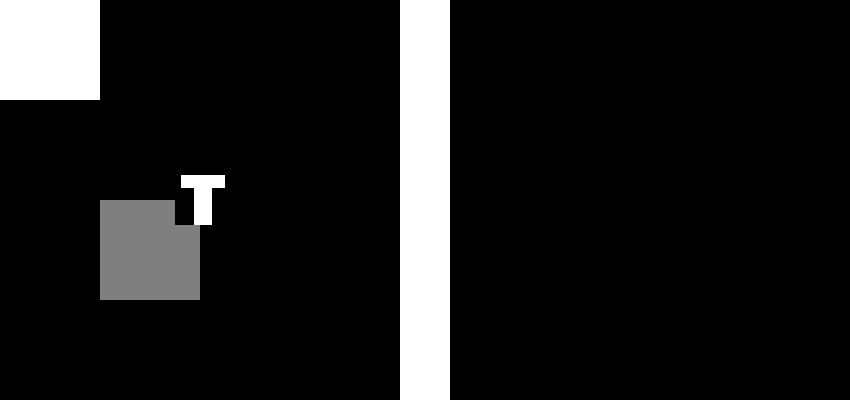

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


                               
\------------------------------/
 \----------------------------/
  Congrats - successful trial!
 /----------------------------\
/------------------------------\


In [0]:
########################
## LOAD MODEL and Demonstrate
########################

c = 2           # Input size
d = 1           # Hidden size
lr_dummy = 0.25
env = CountEnv(mode="pick_square", max_dist = 10, n_squares = 2, display = "game", save_epoch = True )
env.task="touch_all_objects"
env.rand_n_squares = False
env.print_action_onehot_aftersteps = False
env.reset()

model = LangConvLSTMCell(c,d,env,lr_dummy)

PATH = "/content/drive/My Drive/Embodied_counting/Results/touch_all_objects___from_pretrained_1_TIMES__4135/touch_all_objects_1_to_5_20-01-23-15-00model-6131_/touch_all_objects_1_to_5_20-01-23-15-00model-6131_"
model.load_state_dict(torch.load(PATH))

#train_model(task_list=["give_n"], n_squares_=2, num_epochs=200, model=model)
#test_model(env,model,n_test_runs=20)


demonstrate_model(env, model, display_=True)


(2, 20)
<class 'numpy.ndarray'>
(20,)
20


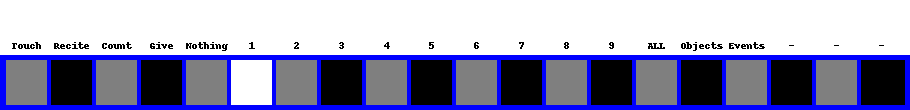

In [0]:
from PIL import ImageDraw 
from PIL import ImageFont
from PIL import Image, ImageOps
#font = ImageFont.truetype("arial.ttf", 16)

draw = ImageDraw.Draw(img)
draw.text((0, 0),"Sample Text",(255,255,255)) #,font=font



task_vector = create_task_vector(env)
task_vector = task_vector.reshape(1, env.task_vector_length)
task_vector = task_vector.detach().numpy().reshape(env.task_vector_length)


for i in range(task_vector.size):
  if(i%2==0):
    task_vector[i] = 0.5


double_task_vector = np.stack( (task_vector,task_vector))
print(double_task_vector.shape)
print(type(task_vector))
print(task_vector[:].shape)
print(env.task_vector_length)
img_width = env.task_vector_length*45
img_height = img_width//20
img = Image.fromarray(double_task_vector*255).resize( (img_width,img_height)).convert('RGB') #.resize( (img_width,img_hight)).convert('RGB')


boundary_color = (0,0,255)
boundary_width = 4

drawy = ImageDraw.Draw(img)
for i in range(env.task_vector_length):
   drawy.line((i*img_height - boundary_width//2 ,0, i*img_height- boundary_width//2,img_height), fill=boundary_color, width = boundary_width )

border_width = 5
img = ImageOps.expand(img, border=border_width, fill = boundary_color)

text_img = Image.new('RGB', (img.width, img.height), color='white')
draw = ImageDraw.Draw(text_img)
node_names_list = ["Touch", "Recite", "Count", "Give","Nothing","1", "2","3", "4","5", "6","7", "8","9", "ALL","Objects", "Events","-", "-", "-"]



for w_i in range(len(node_names_list)):
  wordy = node_names_list[w_i]
  draw.text((border_width + w_i*img_height + img_height//2 - 3*len(wordy), 40),wordy,(0,0,0))

task_img = get_concat_v(text_img, img, distance=0)



display(task_img)



In [0]:
a = "wordy"
len(a)

5

In [0]:
display(img)

In [0]:
def network_array_to_image(array_,node_names_list=None, layer_description=None, img_width=45):
      
      array_ = array_.detach().numpy()
      array_size = array_.size

      array_ = array_.reshape(array_size)

      '''
      for i in range(task_vector.size):
        if(i%2==0):
          task_vector[i] = 0.5
      '''
      double_array_ = np.stack( (array_,array_))

      img_width = array_size*img_width
      img_height = img_width//array_size
      img = Image.fromarray(double_array_*255).resize( (img_width,img_height)).convert('RGB') 

      boundary_color = (0,0,255)
      boundary_width = 4

      drawy = ImageDraw.Draw(img)
      for i in range(array_size):
        drawy.line((i*img_height - boundary_width//2 ,0, i*img_height- boundary_width//2,img_height), fill=boundary_color, width = boundary_width )

      border_width = 5
      img = ImageOps.expand(img, border=border_width, fill = boundary_color)

      text_img = Image.new('RGB', (img.width, img.height), color='white')
      draw = ImageDraw.Draw(text_img)

      task_font = ImageFont.truetype("/content/drive/My Drive/Embodied_counting/src/Arial.ttf", 24)
      node_font = ImageFont.truetype("/content/drive/My Drive/Embodied_counting/src/Arial.ttf", 12)


      #node_names_list = ["Touch", "Recite", "Count", "Give","Nothing","1", "2","3", "4","5", "6","7", "8","9", "ALL","Objects", "Events","-", "-", "-"]
      if(node_names_list is not None):
          for w_i in range(len(node_names_list)):
            wordy = node_names_list[w_i]
            draw.text((border_width + w_i*img_height + img_height//2 - 3*len(wordy), 40),wordy,(0,0,0), font=node_font)


      description_img = Image.new('RGB', (img.width, img.height), color='white')
      draw_description = ImageDraw.Draw(description_img)
      if(layer_description is not None):
          wordy = layer_description
          draw_description.text((img_width//2 - 3*len(wordy), 0),wordy,(0,0,0),font=task_font)

      array_img = get_concat_v(text_img, img, distance=0)
      array_img = get_concat_v(array_img, description_img, distance=0)

      return array_img

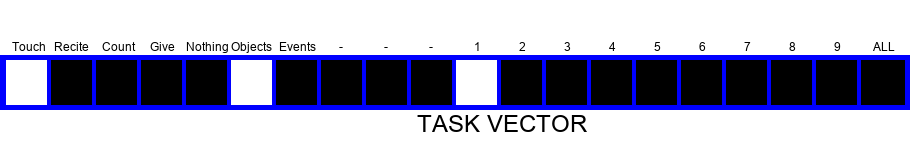

In [0]:
task_vector = create_task_vector(env)
node_names_list = ["Touch", "Recite", "Count", "Give","Nothing","Objects", "Events","-", "-", "-","1", "2","3", "4","5", "6","7", "8","9", "ALL"]
layer_description = "TASK VECTOR"

img = network_array_to_image(array_=task_vector,node_names_list=node_names_list, layer_description=layer_description)
display(img)